In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import ResNet50V2
from keras.applications import MobileNetV2
from keras.applications import DenseNet201
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
RANDOM_STATE = 0

In [ ]:
path_to_cr_data = "/content/drive/MyDrive/Capstone"
img_dirs = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['/content/drive/MyDrive/Capstone/Indira_Nooyi',
 '/content/drive/MyDrive/Capstone/Dalai_Lama',
 '/content/drive/MyDrive/Capstone/Melinda_Gates',
 '/content/drive/MyDrive/Capstone/Virat_Kohli',
 '/content/drive/MyDrive/Capstone/Bill_Gates',
 '/content/drive/MyDrive/Capstone/Vikas_Khanna',
 '/content/drive/MyDrive/Capstone/Narendra_Modi',
 '/content/drive/MyDrive/Capstone/Anushka_Sharma',
 '/content/drive/MyDrive/Capstone/Barack_Obama',
 '/content/drive/MyDrive/Capstone/Sundar_Pichai']

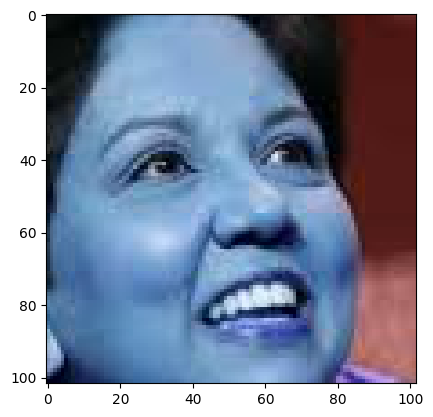

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Capstone/Indira_Nooyi/Indira_Nooyi84.png')
plt.imshow(img)

In [ ]:
img.shape

(102, 102, 3)

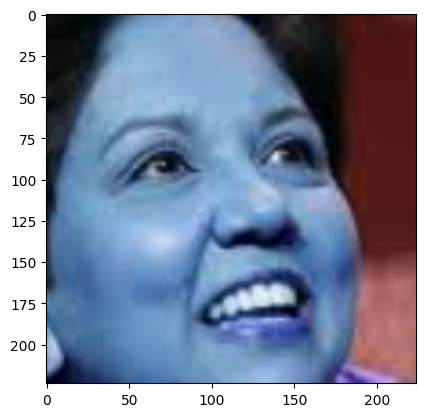

In [ ]:
resized_raw_img = cv2.resize(img, (224, 224))
plt.imshow(resized_raw_img)

**Data Preprocessing**

In [ ]:
celebrity_file_names_dict={}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [ ]:
for k, v in celebrity_file_names_dict.items():
  print(k, len(v))

Indira_Nooyi 256
Dalai_Lama 231
Melinda_Gates 394
Virat_Kohli 276
Bill_Gates 217
Vikas_Khanna 294
Narendra_Modi 224
Anushka_Sharma 258
Barack_Obama 338
Sundar_Pichai 228


In [ ]:
img_list_height = []
img_list_width = []
for k, v in celebrity_file_names_dict.items():
    for im in v:
        img = cv2.imread(im)
        img_list_height.append(img.shape[0])
        img_list_width.append(img.shape[1])

Text(0.5, 1.0, 'count vs image height')

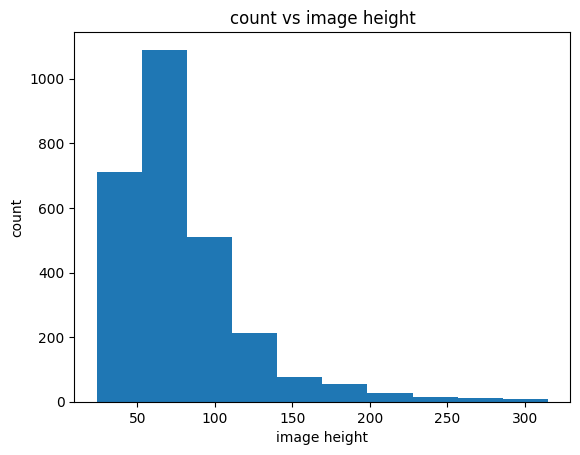

In [ ]:
plt.hist(img_list_height)
plt.xlabel('image height')
plt.ylabel('count')
plt.title('count vs image height')

Text(0.5, 1.0, 'count vs image width')

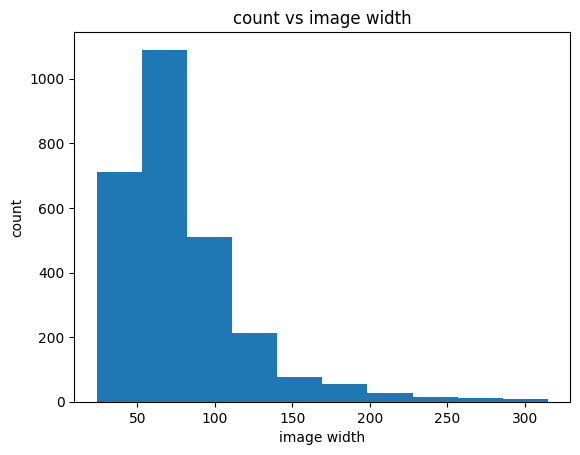

In [ ]:
plt.hist(img_list_width)
plt.xlabel('image width')
plt.ylabel('count')
plt.title('count vs image width')

In [ ]:
del img_list_height, img_list_width

In [ ]:
IMG_SIZE = [224,224]

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Indira_Nooyi': 0,
 'Dalai_Lama': 1,
 'Melinda_Gates': 2,
 'Virat_Kohli': 3,
 'Bill_Gates': 4,
 'Vikas_Khanna': 5,
 'Narendra_Modi': 6,
 'Anushka_Sharma': 7,
 'Barack_Obama': 8,
 'Sundar_Pichai': 9}

In [ ]:
inv_dict = dict(zip(class_dict.values(), class_dict.keys()))
inv_dict

{0: 'Indira_Nooyi',
 1: 'Dalai_Lama',
 2: 'Melinda_Gates',
 3: 'Virat_Kohli',
 4: 'Bill_Gates',
 5: 'Vikas_Khanna',
 6: 'Narendra_Modi',
 7: 'Anushka_Sharma',
 8: 'Barack_Obama',
 9: 'Sundar_Pichai'}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        X.append(img)
        y.append(class_dict[celebrity_name])

In [ ]:
X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=RANDOM_STATE)

In [ ]:
Total_Pixels = 0
B_sum  = 0
G_sum = 0
R_sum = 0

for img in X_train_temp:
    Total_Pixels = Total_Pixels  + img.shape[0]*img.shape[1]
    (B,G,R) = cv2.split(img)
    B_sum = B_sum + B.sum()
    G_sum = G_sum + G.sum()
    R_sum = R_sum + R.sum()


B_mean = B_sum/Total_Pixels
G_mean = G_sum/Total_Pixels
R_mean = R_sum/Total_Pixels

In [ ]:
X_train = []
for img in X_train_temp:
    if img is not None:
        img_resized = cv2.resize(img, (IMG_SIZE[0], IMG_SIZE[1]))
        (B,G,R) = cv2.split(img_resized)
        B = B - B_mean
        G = G - G_mean
        R = R - R_mean
        img_preprocessed = cv2.merge([B, G, R])
        X_train.append(img_preprocessed)

In [ ]:
X_test = []
for img in X_test_temp:
    if img is not None:
        img_resized = cv2.resize(img, (IMG_SIZE[0], IMG_SIZE[1]))
        (B,G,R) = cv2.split(img_resized)
        B = B - B_mean
        G = G - G_mean
        R = R - R_mean
        img_preprocessed = cv2.merge([B, G, R])
        X_test.append(img_preprocessed)

In [ ]:
del X_train_temp, X_test_temp, B, G, R, B_mean, G_mean, R_mean, img_resized, img_preprocessed, Total_Pixels

In [ ]:
len(X_train)

2172

In [ ]:
len(X_test)

544

In [ ]:
len(y_train)

2172

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

**VGG16 Model Building**

In [ ]:
INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)
N_CLASSES = 10
OPTIMIZER = Adam(learning_rate=0.0001)
LOSS_FUNC = 'sparse_categorical_crossentropy'
METRICS = ['accuracy']
EPOCHS = 10
BATCH_SIZE = 32
OUTPUT_ACTIVATION = 'softmax'

In [ ]:
def create_model_vgg16(input_shape, n_classes, optimizer, loss_func, metrics, output_activation, freeze):

    conv_base = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    if freeze > 0:
        for layer in conv_base.layers[:-freeze]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False


    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation=output_activation)(top_model)


    model = Model(inputs=conv_base.input, outputs=output_layer)

    model.compile(optimizer=optimizer,
                  loss=loss_func,
                  metrics=metrics)

    return model

In [ ]:
def training_accuracy_plot(history,model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

In [ ]:
def training_loss_plot(history,model):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

In [ ]:
vgg_model = create_model_vgg16(INPUT_SHAPE, N_CLASSES, OPTIMIZER, LOSS_FUNC, METRICS, OUTPUT_ACTIVATION,0)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history_vgg16 = vgg_model.fit(X_train, y_train, batch_size=BATCH_SIZE, validation_split=0.15,epochs=EPOCHS, shuffle=True)

Epoch 1/10
58/58 [==============================] - 28s 245ms/step - loss: 4.2856 - accuracy: 0.7319 - val_loss: 0.6683 - val_accuracy: 0.9080
Epoch 2/10
58/58 [==============================] - 10s 174ms/step - loss: 0.1965 - accuracy: 0.9642 - val_loss: 0.6253 - val_accuracy: 0.9294
Epoch 3/10
58/58 [==============================] - 10s 170ms/step - loss: 0.0524 - accuracy: 0.9848 - val_loss: 0.6051 - val_accuracy: 0.9264
Epoch 4/10
58/58 [==============================] - 11s 195ms/step - loss: 0.0479 - accuracy: 0.9892 - val_loss: 0.8297 - val_accuracy: 0.9018
Epoch 5/10
58/58 [==============================] - 10s 175ms/step - loss: 0.0307 - accuracy: 0.9924 - val_loss: 0.6832 - val_accuracy: 0.9202
Epoch 6/10
58/58 [==============================] - 11s 194ms/step - loss: 0.0358 - accuracy: 0.9908 - val_loss: 1.3079 - val_accuracy: 0.8773
Epoch 7/10
58/58 [==============================] - 11s 196ms/step - loss: 0.1315 - accuracy: 0.9789 - val_loss: 0.8330 - val_accuracy: 0.9202

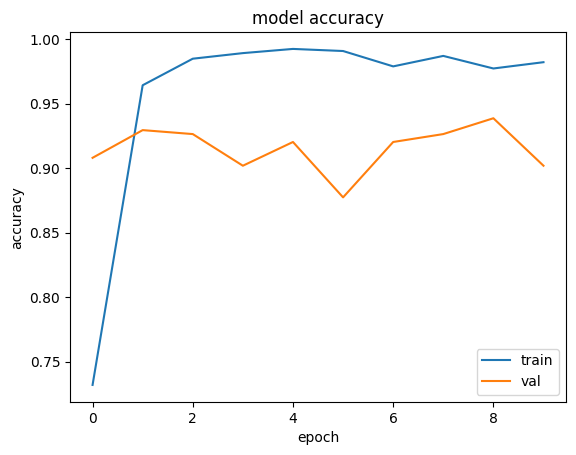

In [ ]:
training_accuracy_plot(history_vgg16,vgg_model)

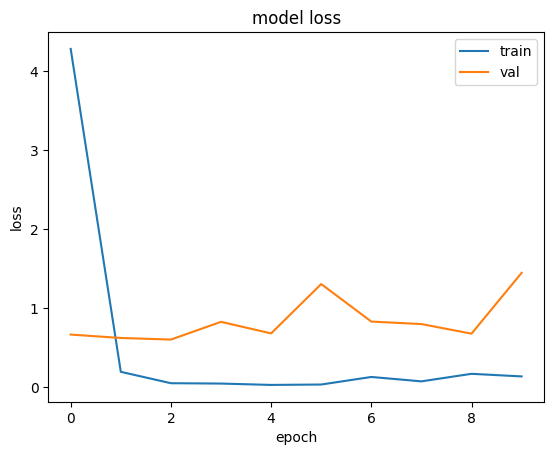

In [ ]:
training_loss_plot(history_vgg16,vgg_model)

In [ ]:
test_loss, test_accuracy = vgg_model.evaluate(X_test, y_test)
test_accuracy_vgg16 = test_accuracy*100

17/17 [==============================] - 2s 128ms/step - loss: 1.1480 - accuracy: 0.9062


In [ ]:
y_pred = vgg_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

17/17 [==============================] - 2s 122ms/step


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.92        49
           1       0.87      0.93      0.90        44
           2       0.96      0.93      0.95        74
           3       1.00      0.89      0.94        63
           4       0.60      0.98      0.74        43
           5       0.89      0.89      0.89        57
           6       1.00      0.89      0.94        45
           7       0.95      0.89      0.92        44
           8       0.95      0.87      0.91        71
           9       0.96      0.93      0.94        54

    accuracy                           0.91       544
   macro avg       0.92      0.91      0.91       544
weighted avg       0.93      0.91      0.91       544



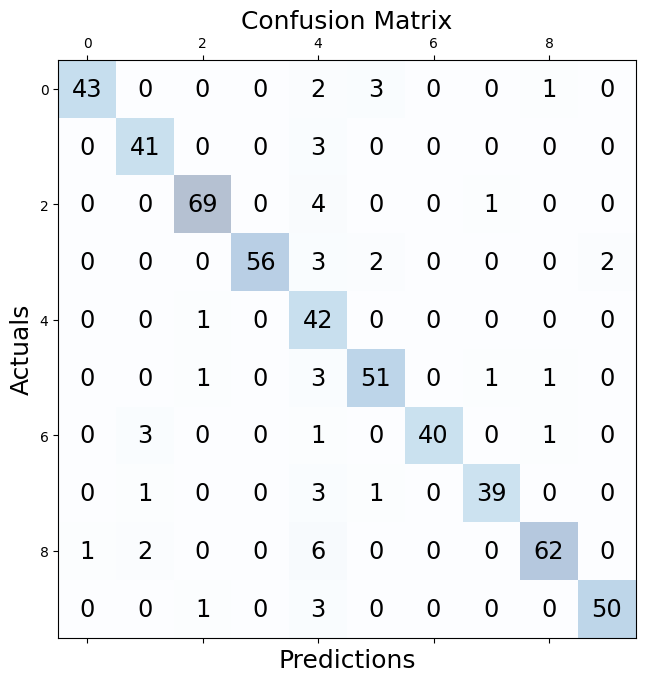

In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred_classes)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()